In [4]:
import pandas as pd

# 加载 CSV 文件
df = pd.read_csv('/export/home/zhaoyh/HXY/AGS/AGSIC50.csv')

# 查看数据的前几行
print(df.head())

# 检查数据类型和缺失值
print(df.info())

# 检查 pIC50 的分布
print(df['pIC50'].describe())

   pIC50
0  10.04
1   9.52
2   9.52
3   9.40
4   9.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pIC50   635 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB
None
count    635.000000
mean       5.552016
std        1.119138
min        4.000000
25%        4.760000
50%        5.280000
75%        6.000000
max       10.040000
Name: pIC50, dtype: float64


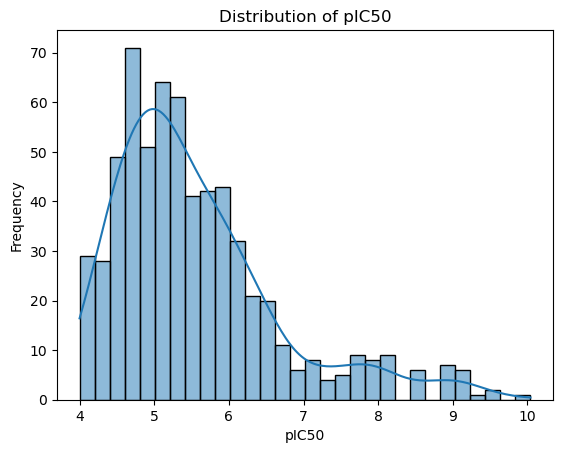

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制分布图
sns.histplot(df['pIC50'], kde=True, bins=30)
plt.xlabel('pIC50')
plt.ylabel('Frequency')
plt.title('Distribution of pIC50')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

# 提取 pIC50 列
pIC50 = df[['pIC50']]  # 注意 [[]] 表示保留为 DataFrame 格式

# 标准化处理
scaler = StandardScaler()
pIC50_scaled = scaler.fit_transform(pIC50)

# 将结果存回 DataFrame
df['pIC50_scaled'] = pIC50_scaled

# 查看结果
print(df.head())

   pIC50  pIC50_scaled
0  10.04      4.013377
1   9.52      3.548367
2   9.52      3.548367
3   9.40      3.441057
4   9.22      3.280092


In [7]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 提取 pIC50 列
pIC50 = df[['pIC50']]  # 注意 [[]] 表示保留为 DataFrame 格式

# 标准化处理
scaler = StandardScaler()
pIC50_scaled = scaler.fit_transform(pIC50)

# 将结果存回 DataFrame
df['pIC50_scaled'] = pIC50_scaled

# 查看结果
print(df.head())

# 保存为 CSV 文件
df.to_csv('output_file.csv', index=False)  # `index=False` 表示不保存行索引


   pIC50  pIC50_scaled
0  10.04      4.013377
1   9.52      3.548367
2   9.52      3.548367
3   9.40      3.441057
4   9.22      3.280092


In [17]:
import pandas as pd
import numpy as np

# 1. 读取标准化后的数据
df = pd.read_csv('/export/home/zhaoyh/HXY/AGS/pIC50.csv')

# 假设 CSV 文件中标准化后的 pIC50 列名为 'pIC50_scaled'
pred_scaled = df['pIC50_scaled'].values  # 获取标准化后的值

# 2. 反标准化（使用给定的均值和标准差）
mean = 5.552016
std = 1.119138

# 反标准化公式
pred_pIC50 = pred_scaled * std + mean  # 反标准化为 pIC50

# 3. 如果需要转换为 IC50，使用 IC50 = 10^(-pIC50)
pred_IC50 = 10 ** -pred_pIC50  # 转换为 IC50

# 4. 将反标准化后的结果保存到新的 DataFrame
df['pIC50'] = pred_pIC50  # 反标准化的 pIC50
df['IC50'] = pred_IC50  # 转换后的 IC50

# 5. 保存为新的 CSV 文件
df.to_csv('/export/home/zhaoyh/HXY/AGS/1pIC50.csv', index=False)

print("反标准化的结果已保存到 ''/export/home/zhaoyh/HXY/AGS/1pIC50.csv.")

反标准化的结果已保存到 ''/export/home/zhaoyh/HXY/AGS/1pIC50.csv.
